In [1]:
'''
Detecting Data Fraud Case Study
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('/home/david/Documents/temp/data.json')
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [3]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [4]:
#df.info()

In [5]:
df['fraud'] = np.where((df.acct_type == 'fraudster_event')
                       | (df.acct_type == 'fraudster')
                       | (df.acct_type == 'fraudster_att')
                       , 1
                       , 0
                      )
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [6]:
df.fraud.value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [7]:
# downsample
df = df.groupby('fraud').apply(lambda x: x.sample(n=1293)).reset_index(drop=True)
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,premium,1380493800,2763,8,US,USD,1.0,"<p><span style=""font-family: arial, helvetica,...",ifas.ufl.edu,1376924239,...,1260,1268081172,3,6700 Clark Road,US,27.266313,-82.437641,UF/IFAS Extension Sarasota County,FL,0
1,premium,1349845200,5877,0,AU,AUD,1.0,"<h6><span style=""font-size: 12pt; color: black...",tasmanianambulancevolunteers.asn.au,1340750149,...,1039,1250932030,4,Wrest Point Convention Centre,AU,-42.901753,147.338471,,Tasmania,0
2,premium,1344470400,4876,11,US,USD,1.0,"<div class=""panel_body"">\r\n<p><strong><span s...",gfnet.com,1335881155,...,1513,1205154552,3,4700 Sleepy Hole Road,US,36.728205,-76.583562,Sleepy Hole Golf Course,VA,0
3,premium,1301097600,727,4,US,USD,0.0,<p>Come spend a Sunday afternoon in the countr...,gmail.com,1298009145,...,13,1296853175,4,452 1st St E,US,38.292577,-122.456397,La Salette Restaurant,CA,0
4,premium,1301889600,1615,6,US,USD,0.0,"<table style=""width: 100%;"" border=""0"">\r\n<tb...",racetonowhere.com,1299108837,...,398,1264709634,3,2400 Pinetree Drive,US,25.802601,-80.129837,RASG Hebrew Academy,FL,0


In [8]:
df.shape

(2586, 45)

In [9]:
df.fraud.value_counts()

1    1293
0    1293
Name: fraud, dtype: int64

In [10]:
df_fraud = df[df.fraud == 1]
df_fraud.shape

(1293, 45)

In [11]:
df_true = df[df.fraud != 1]
df_true.shape

(1293, 45)

In [12]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

In [13]:
df.iloc[3]


acct_type                                                       premium
approx_payout_date                                           1301097600
body_length                                                         727
channels                                                              4
country                                                              US
currency                                                            USD
delivery_method                                                       0
description           <p>Come spend a Sunday afternoon in the countr...
email_domain                                                  gmail.com
event_created                                                1298009145
event_end                                                    1300665600
event_published                                             1.29824e+09
event_start                                                  1300654800
fb_published                                                    

In [14]:
df.description.iloc[3] # use beautiful soup

"<p>Come spend a Sunday afternoon in the country at La Salette Portuguese restaurant in Sonoma where chef Manuel Azevedo will prepare a traditional meal of Sopas (braised beef in a minted broth with cabbage, bread and sweet potato), a traditional food of local Portuguese festas. An appetizer precedes the Sopas followed by \xa0a traditional Portuguese dessert.\xa0Salon del Vino is hosting this special event at one of the Bay Area's only Portuguese restaurants. The meal is accompanied by a tasting of Portuguese wines from local distributor Vinos Unico. \xa0Four Portuguese wines (one sparkling, one white, two reds) will be poured with the meal. Details and notes on all the wines and the food will be available during the lunch.</p>"

In [15]:
from bs4 import BeautifulSoup

In [16]:
soup = BeautifulSoup(df.description.iloc[5])

In [17]:
soup.find_all('p')[5].get_text()

'Please visit pmimassbay.org for complete event details.'

In [18]:
texts = []
for text in soup.find_all('p'):
    texts.append(text.get_text())

In [19]:
texts

['\xa0',
 'The Agile PMP®: Scrum, PMBOK® Guide and the new PMI Agile Certification (PMI-ACP)SM ',
 'Early Bird Registration ends Friday, 9/14/12 at MidnightStandard Registration extended to October 4, 2012 at Midnight',
 'Member = PMI Mass Bay Chapter Member',
 'Non-Member = Other PMI Chapter Members or Public Attendees',
 'Please visit pmimassbay.org for complete event details.',
 'All ticket sales are FINAL and come with a No Refunds, No Exchanges policy.',
 'Tickets are NOT available at the door.',
 '\xa0']

In [20]:
text2_str = ' '.join(texts)
text2_str

'\xa0 The Agile PMP®: Scrum, PMBOK® Guide and the new PMI Agile Certification (PMI-ACP)SM  Early Bird Registration ends Friday, 9/14/12 at MidnightStandard Registration extended to October 4, 2012 at Midnight Member = PMI Mass Bay Chapter Member Non-Member = Other PMI Chapter Members or Public Attendees Please visit pmimassbay.org for complete event details. All ticket sales are FINAL and come with a No Refunds, No Exchanges policy. Tickets are NOT available at the door. \xa0'

### Make a function to convert description into string

In [21]:
def to_string(des):
    
    from bs4 import BeautifulSoup
    import string, re
    from num2words import num2words as n2w # may have to download this, terminal: pip3 install num2words
    
    soup = BeautifulSoup(des)
    texts = []
    for text in soup.find_all('p'): # gets all the words in paragraphs 
        texts.append(text.get_text())
    texts = ' '.join(texts).lower() # joins sentences together into one long paragraphs
    texts = texts.replace('$', 'dollar ') # change $ symbole to 'dollar'
    texts = re.split(r'\W+', texts) # keeps all the words and numbers only, drops all symbol characters 
    
    new_words = []
    for word in texts: 
        if word[-2:] == 'am' or word[-2:] == 'pm': # split am and pm from numbers
            new_words.append(word[:-2]) 
            new_words.append(word[-2:])
        else:
            new_words.append(word)
    
    texts = new_words
    
    new_words = []
    for word in texts:
        if word.isdigit(): # changes numbers into words 200 becomes two hundred 
            new_words.append(n2w(int(word)))
        else:
            new_words.append(word)
            
    texts = new_words
    
    new_words = []
    for word in texts:
        if ' ' in word:
            new_words.extend(word.split(' '))
        else:
            new_words.append(word)
    
    return ' '.join(new_words)

In [22]:
to_string(df.description.iloc[2])

'this is a scholarship fund raiser event the tournament format will be four man captain s choice with eight zero  am shotgun start check in at seven zero  am a picnic will immediately follow the tournament prizes will be given out for 1st place te am 2nd place te am two closest to the pin two longest drive prizes will be flighted based on number of entries raffle tickets and fifty fifty raffle tickets will be sold limited to the first one hundred and twenty entries please respond by friday july twenty-seven two thousand and twelve for payments made by check make checks payable to ceevc and mail to urs corporation attn gary webb two hundred and seventy-seven bendix road suite five hundred virginia beach va twenty-three thousand, four hundred and fifty-two eleven thousand and thirty-eight check payments will also be accepted at the registration table proceeds from this event go to supporting two undergraduate and one graduate student scholarships in the odu civil and environmental engine

In [23]:
# text2 = to_string(df.description.iloc[2]).lower()
# text2

In [24]:
# text2 = text2.replace('$', 'dollar ')
# text2

In [25]:
# import re
# words = re.split(r'\W+', text2)
# words

In [26]:
# new_words = []
# for word in words:
#     if word[-2:] == 'am' or word[-2:] == 'pm':
#         new_words.append(word[:-2])
#         new_words.append(word[-2:])
#     else:
#         new_words.append(word)
# new_words

In [27]:
# from num2words import num2words as n2w

# new_words_text_only = []
# for word in new_words:
#     if word.isdigit():
#         new_words_text_only.append(n2w(int(word)))
#     else:
#         new_words_text_only.append(word)
# new_words_text_only

In [28]:
# final_word_lst = []
# for word in new_words_text_only:
#     if ' ' in word:
#         final_word_lst.extend(word.split(' '))
#     else:
#         final_word_lst.append(word)
# final_word_lst

In [29]:
string_only = ''.join(to_string(df.description.iloc[2]))
string_only

'this is a scholarship fund raiser event the tournament format will be four man captain s choice with eight zero  am shotgun start check in at seven zero  am a picnic will immediately follow the tournament prizes will be given out for 1st place te am 2nd place te am two closest to the pin two longest drive prizes will be flighted based on number of entries raffle tickets and fifty fifty raffle tickets will be sold limited to the first one hundred and twenty entries please respond by friday july twenty-seven two thousand and twelve for payments made by check make checks payable to ceevc and mail to urs corporation attn gary webb two hundred and seventy-seven bendix road suite five hundred virginia beach va twenty-three thousand, four hundred and fifty-two eleven thousand and thirty-eight check payments will also be accepted at the registration table proceeds from this event go to supporting two undergraduate and one graduate student scholarships in the odu civil and environmental engine

In [30]:
letter_dict = {}
for letter in string_only:
    if letter in letter_dict:
        letter_dict[letter] += 1
    else:
        letter_dict[letter] = 1


vals = []
for x in letter_dict.values():
    vals.append(x)


first_vals_dict = {}
for x in vals:
    if int(str(x)[0]) in first_vals_dict:
        first_vals_dict[int(str(x)[0])] += 1
    else:
        first_vals_dict[int(str(x)[0])] = 1

sorted_firsts = sorted(first_vals_dict.items())
sorted_firsts

[(1, 8), (2, 7), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3)]

In [31]:
x = [x[0] for x in sorted_firsts]
y = [x[1] for x in sorted_firsts]
print(x)
print(y) # use this as a table to model 

[1, 2, 3, 4, 5, 6, 7, 8]
[8, 7, 3, 2, 3, 2, 2, 3]


In [32]:
# look up different ways to normalize: min, max
# look up: log trap. area under the curve rules 

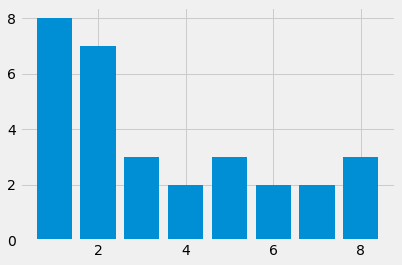

In [33]:
plt.bar(x,y);

In [34]:
lst_firsts = []
for i in range(len(x)):
    for itr in range(y[i]):
        lst_firsts.append(x[i])
lst_firsts

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 8]

In [35]:
def median(lst):
    n = len(lst)
    if n%2 == 0:
        return round((lst[n//2 -1] + lst[n//2])/2, 1)
    else: 
        return lst[n//2]

In [36]:
median(lst_firsts)

2.5

In [37]:
to_string(df.description.iloc[2])

'this is a scholarship fund raiser event the tournament format will be four man captain s choice with eight zero  am shotgun start check in at seven zero  am a picnic will immediately follow the tournament prizes will be given out for 1st place te am 2nd place te am two closest to the pin two longest drive prizes will be flighted based on number of entries raffle tickets and fifty fifty raffle tickets will be sold limited to the first one hundred and twenty entries please respond by friday july twenty-seven two thousand and twelve for payments made by check make checks payable to ceevc and mail to urs corporation attn gary webb two hundred and seventy-seven bendix road suite five hundred virginia beach va twenty-three thousand, four hundred and fifty-two eleven thousand and thirty-eight check payments will also be accepted at the registration table proceeds from this event go to supporting two undergraduate and one graduate student scholarships in the odu civil and environmental engine

### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
words1 = to_string(df.description.iloc[2])
words2 = to_string(df.description.iloc[3])
words3 = to_string(df.description.iloc[4])

In [40]:
word_lst = [words1
            , words2
            , words3
           ]
tf_model = TfidfVectorizer()
vectors = tf_model.fit_transform(word_lst)
vectors[0].T.todense()

matrix([[0.04726303],
        [0.04726303],
        [0.04726303],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.04726303],
        [0.18905212],
        [0.        ],
        [0.        ],
        [0.33497169],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05582861],
        [0.04726303],
        [0.        ],
        [0.        ],
        [0.04726303],
        [0.        ],
        [0.17972377],
        [0.04726303],
        [0.        ],
        [0.        ],
        [0.04726303],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.07188951],
        [0.        ],
        [0.03594475],
        [0.        ],
        [0.04726303],
        [0.04726303],
        [0.09452606],
        [0.        ],
        [0.        ],
        [0.14178909],
        [0

In [41]:
df['desc_string'] = df.description.apply(to_string)

In [42]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,premium,1380493800,2763,8,US,USD,1.0,"<p><span style=""font-family: arial, helvetica,...",ifas.ufl.edu,1376924239,...,1268081172,3,6700 Clark Road,US,27.266313,-82.437641,UF/IFAS Extension Sarasota County,FL,0,this class is designed to provide training in ...
1,premium,1349845200,5877,0,AU,AUD,1.0,"<h6><span style=""font-size: 12pt; color: black...",tasmanianambulancevolunteers.asn.au,1340750149,...,1250932030,4,Wrest Point Convention Centre,AU,-42.901753,147.338471,,Tasmania,0,ambulance tasmania and the volunteer ambulance...
2,premium,1344470400,4876,11,US,USD,1.0,"<div class=""panel_body"">\r\n<p><strong><span s...",gfnet.com,1335881155,...,1205154552,3,4700 Sleepy Hole Road,US,36.728205,-76.583562,Sleepy Hole Golf Course,VA,0,this is a scholarship fund raiser event the to...
3,premium,1301097600,727,4,US,USD,0.0,<p>Come spend a Sunday afternoon in the countr...,gmail.com,1298009145,...,1296853175,4,452 1st St E,US,38.292577,-122.456397,La Salette Restaurant,CA,0,come spend a sunday afternoon in the country a...
4,premium,1301889600,1615,6,US,USD,0.0,"<table style=""width: 100%;"" border=""0"">\r\n<tb...",racetonowhere.com,1299108837,...,1264709634,3,2400 Pinetree Drive,US,25.802601,-80.129837,RASG Hebrew Academy,FL,0,an education film that gets it washington pos...


In [43]:
df.desc_string.iloc[0]

'this class is designed to provide training in best management practices for anyone working in the lawn landscape pest control or municipal grounds areas best management practices are focused on reducing non point source pollution resulting from fertilization or pesticide application in many areas you are required to be certified in the bmps to be able to bid on jobs apply fertilizer or have commercial customers the state of florida will require all commercial fertilizer applicators to obtain a limited certification for commercial fertilizer application license by january one two thousand and fourteen certification in bmps will be required to obtain this license applications for the license will be available at the bmp seminar following completion of this training you will be given a post test to determine knowledge learned if the post test is successfully completed you will be mailed a certificate of completion cost of the class is dollar ten zero and includes continental breakfast lu

In [44]:
# the following needs up to 55.5 gbs of memory!
# this is the reson for downsampling 

In [45]:
tf_model = TfidfVectorizer()
row_vectors = tf_model.fit_transform(df.desc_string)

word_columns = tf_model.get_feature_names()

dense = row_vectors.todense()

dense_list = dense.tolist()


In [46]:
df_tfidf = pd.DataFrame(dense_list, columns = word_columns)

In [47]:
df_tfidf.shape

(2586, 28264)

In [48]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,premium,1380493800,2763,8,US,USD,1.0,"<p><span style=""font-family: arial, helvetica,...",ifas.ufl.edu,1376924239,...,1268081172,3,6700 Clark Road,US,27.266313,-82.437641,UF/IFAS Extension Sarasota County,FL,0,this class is designed to provide training in ...
1,premium,1349845200,5877,0,AU,AUD,1.0,"<h6><span style=""font-size: 12pt; color: black...",tasmanianambulancevolunteers.asn.au,1340750149,...,1250932030,4,Wrest Point Convention Centre,AU,-42.901753,147.338471,,Tasmania,0,ambulance tasmania and the volunteer ambulance...
2,premium,1344470400,4876,11,US,USD,1.0,"<div class=""panel_body"">\r\n<p><strong><span s...",gfnet.com,1335881155,...,1205154552,3,4700 Sleepy Hole Road,US,36.728205,-76.583562,Sleepy Hole Golf Course,VA,0,this is a scholarship fund raiser event the to...
3,premium,1301097600,727,4,US,USD,0.0,<p>Come spend a Sunday afternoon in the countr...,gmail.com,1298009145,...,1296853175,4,452 1st St E,US,38.292577,-122.456397,La Salette Restaurant,CA,0,come spend a sunday afternoon in the country a...
4,premium,1301889600,1615,6,US,USD,0.0,"<table style=""width: 100%;"" border=""0"">\r\n<tb...",racetonowhere.com,1299108837,...,1264709634,3,2400 Pinetree Drive,US,25.802601,-80.129837,RASG Hebrew Academy,FL,0,an education film that gets it washington pos...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,fraudster_event,1348786800,3000,11,US,USD,1.0,"<p class=""MsoNormal"" style=""margin: 0px; color...",gmail.com,1346729184,...,1346118291,1,526 E Hospital St,US,31.603631,-94.650802,Live Oak MIssionary Baptist Church,TX,1,dear friends pastor keith warner first lady s...
2582,fraudster_event,1358553600,4047,0,CA,CAD,1.0,"<p><span style=""font-family: arial black,avant...",diversity-church.com,1354636590,...,1341189473,1,Blow The Whistle On Bullying ~ It Matters Wha...,,0.000000,0.000000,Blow The Whistle On Bullying ~ It Matters What...,,1,country artist kylie morgan heading across nor...
2583,fraudster_event,1372483800,7848,11,,USD,0.0,"<p><img title=""Going wild!"" alt=""A great off-...",hotmail.com,1371668087,...,1371668085,1,Mama Ngina Street,KE,-1.285769,36.822875,Kenyatta International Conference Centre,Nairobi,1,sino africa ltd the only multinational travel...
2584,fraudster,1328756400,428,6,US,USD,0.0,<p>Hello. I the chess player and I have decide...,yahoo.com,1328136991,...,1328136990,1,10768 Seacliff Circle,US,26.397105,-80.216053,,FL,1,hello i the chess player and i have decided to...


In [49]:
df_tfidf.shape

(2586, 28264)

In [50]:
df.shape

(2586, 46)

In [51]:
df_tfidf = df_tfidf.assign(f = df.fraud)

In [52]:
df_tfidf.shape

(2586, 28265)

In [53]:
df_tfidf

,000includes,00a,00ambhangra,00birthday,00for,00h30,00hrs,00p,00pmfriday,00pmsaturday,...,泛舟,海上生明月,祈愿人圆,让我们在周末闲暇之时,请大家快快行动,身处海外的你我在月圆中秋的日子里,迎风望月,邀请各界友人,露从今夜白,f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
df_tfidf = df_tfidf.sample(frac=1)

In [55]:
df_tfidf

,000includes,00a,00ambhangra,00birthday,00for,00h30,00hrs,00p,00pmfriday,00pmsaturday,...,泛舟,海上生明月,祈愿人圆,让我们在周末闲暇之时,请大家快快行动,身处海外的你我在月圆中秋的日子里,迎风望月,邀请各界友人,露从今夜白,f
2321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Random Forest Classifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df_tfidf.drop('f', axis=1)
y = df_tfidf.f
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.25
                                                    , random_state = 42
                                                   )

In [58]:
X_train.shape

(1939, 28264)

In [59]:
X_test.shape

(647, 28264)

In [60]:
y_train.shape

(1939,)

In [61]:
y_test.shape

(647,)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(n_estimators = 199
                                  , bootstrap = True
                                  , max_features = 'sqrt'
                                 )

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=199)

In [64]:
yhat = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [65]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8658656790690553

In [66]:
# feature importances

fi = pd.DataFrame({'word': list(X_train.columns)
                   , 'importance': rf_model.feature_importances_
                  }
                 ).sort_values('importance', ascending = False)
fi.head()

,word,importance
2264,at,0.012418
10203,for,0.009253
25163,the,0.008037
1623,and,0.007888
27522,will,0.007624


In [67]:
# To Do: Need to Filter out Stop words, upsample 

### Check for Benford's Distribution

In [68]:

body_lengths_true = df_true.body_length.values
int(str(body_lengths_true[1])[0])

5

In [69]:
body_lengths_true_first = [int(str(x)[0]) for x in body_lengths_true]

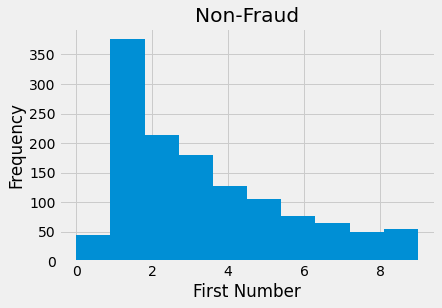

In [70]:
plt.hist(body_lengths_true_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Non-Fraud');

In [71]:
body_lengths_fraud = df_fraud.body_length.values
body_lengths_fraud_first = [int(str(x)[0]) for x in body_lengths_fraud]

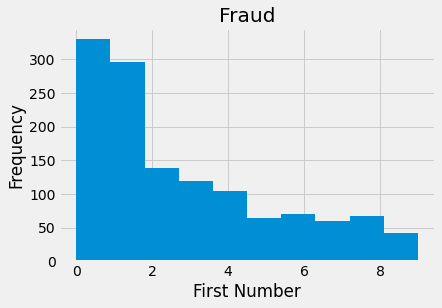

In [72]:
plt.hist(body_lengths_fraud_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Fraud');

In [73]:
# class imbalance, do over or under sampling. 
# vectorize the words and then add body length to train model 
# use tf-idf, count vectorizer to train the model 